<a href="https://colab.research.google.com/github/yangjunn/SIAReviews_SentimentAnalysis/blob/main/FINAL_CODES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singapore Airlines (SIA) Context

Our project aims to carry out sentiment analysis on consumer reviews of Singapore Airlines (SIA) to gain insight into customer emotions and key discussion topics. We aim to do so by implementing Machine Learning models for classification such as SVM. The findings from this study can help SIA understand passenger sentiment and thus improve service quality where necessary.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams

In [ ]:
siadata = pd.read_csv("sample_data/singapore_airlines_reviews.csv") # every new runtime, just add the csv to sample_data and it should run :)
siadata.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


# Exploratory Data Analysis (EDA)

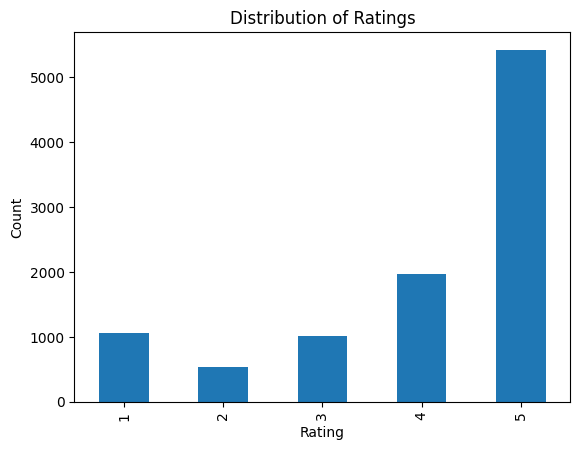

In [ ]:
siadata["rating"].value_counts().sort_index(ascending=True).plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

We notice that ratings are heavily skewed towards 5. Since SIA is a highly acclaimed air service, it's natural for the data to be skewed like this.

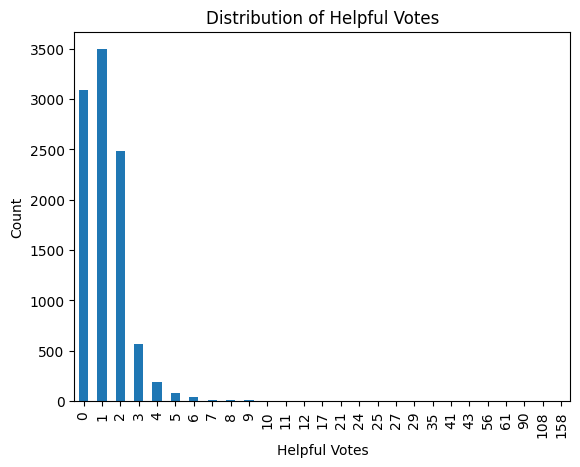

In [ ]:
siadata["helpful_votes"].value_counts().sort_index(ascending=True).plot(kind="bar")

plt.xlabel("Helpful Votes")
plt.ylabel("Count")
plt.title("Distribution of Helpful Votes")
plt.show()

In [ ]:
siadata["sentence_length"] = siadata["text"].str.split().apply(len)
siadata["char_length"] = siadata["text"].str.len()

siadata.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,sentence_length,char_length
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,251,1352
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,842,4666
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,78,420
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,23,144
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,103,582


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
#count number of sentences
siadata["num_sentences"] = siadata["text"].apply(lambda x: len(sent_tokenize(x)))

# Count number of words in each sentence
siadata["num_words"] = siadata["text"].apply(lambda x: len(word_tokenize(x)))

# Count number of characters
siadata["num_char"] = siadata["text"].str.len()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


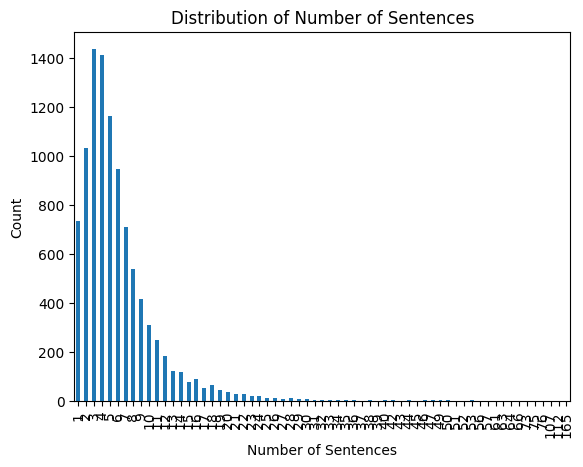

In [ ]:
siadata["num_sentences"].value_counts().sort_index(ascending=True).plot(kind="bar")

plt.xlabel("Number of Sentences")
plt.ylabel("Count")
plt.title("Distribution of Number of Sentences")
plt.show()

<ipython-input-12-221d26405d1c>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Rating")


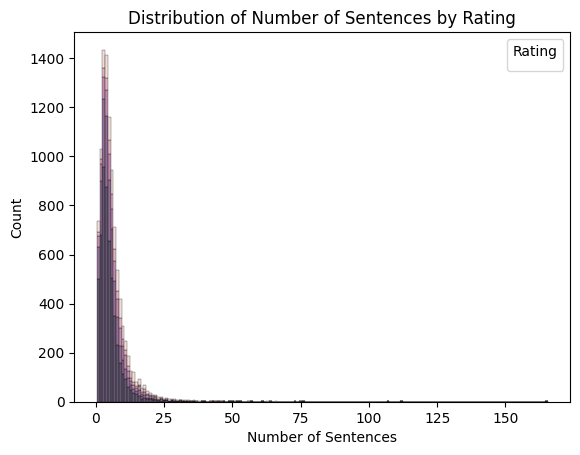

In [ ]:
sns.histplot(data=siadata, x="num_sentences", hue="rating", multiple="stack", discrete=True)

plt.xlabel("Number of Sentences")
plt.ylabel("Count")
plt.title("Distribution of Number of Sentences by Rating")
plt.legend(title="Rating")
plt.show()

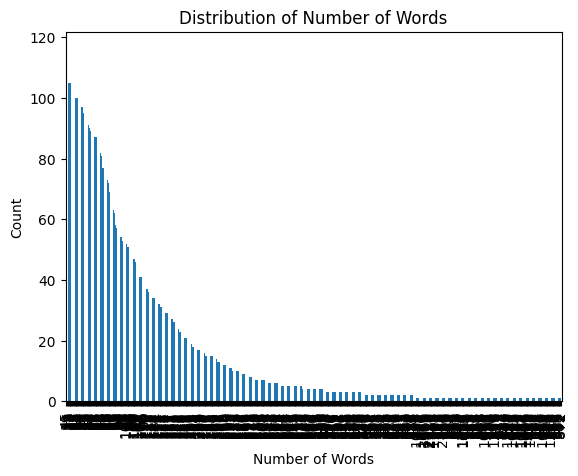

In [ ]:
siadata["num_words"].value_counts(sort=True).plot(kind="bar")

plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.title("Distribution of Number of Words")
plt.show()

In [ ]:
#top 10 words, no filter
# Combine all text data into one large string
all_text = " ".join(siadata["text"].dropna()).lower()

# Tokenize and clean text (remove punctuation, convert to lowercase)
words = re.findall(r'\b\w+\b', all_text)

# Count word frequency
word_counts = Counter(words)

# Display most common words
print(word_counts.most_common(10))

[('the', 51275), ('and', 32137), ('to', 30761), ('was', 20402), ('a', 19775), ('i', 19452), ('in', 14493), ('of', 14181), ('flight', 12637), ('singapore', 11860)]


In [ ]:
#top 10 words, filtered by common words
nltk.download("stopwords")

# Get the stopwords list
stop_words = set(stopwords.words("english"))

# Function to clean text and remove stopwords
def clean_text(text):
    if isinstance(text, str):  # Ensure text is a string
        words = re.findall(r'\b\w+\b', text.lower())  # Tokenize words
        return [word for word in words if word not in stop_words]  # Remove stopwords
    return []

# Apply the function to the dataset
siadata["clean_text_tokens"] = siadata["text"].fillna("").apply(clean_text)
siadata["clean_text"] = siadata["clean_text_tokens"].apply(lambda tokens: " ".join(tokens))

# Flatten list and count word frequency
all_words = [word for words in siadata["clean_text_tokens"] for word in words]
word_counts = Counter(all_words)

# Display top 10 most common words after filtering
print(word_counts.most_common(20))

top_20 = word_counts.most_common(20)
top_20_df = pd.DataFrame(top_20, columns=["word","frequency"])
top_20_df.to_csv("top_20", index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('flight', 12637), ('singapore', 11860), ('airlines', 7579), ('service', 6928), ('food', 5654), ('good', 5310), ('airline', 3980), ('time', 3744), ('economy', 3614), ('seats', 3502), ('class', 3487), ('seat', 3315), ('staff', 3266), ('great', 2953), ('crew', 2855), ('one', 2854), ('would', 2755), ('business', 2514), ('comfortable', 2284), ('flights', 2221)]


In [ ]:
def get_ngrams(text, n=2):
    tokens = word_tokenize(text.lower())  # tokenize & convert to lowercase
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords & punctuation
    n_grams = list(ngrams(tokens, n))  # Generate n-grams
    return [" ".join(gram) for gram in n_grams]

all_bigrams = []
for text in siadata["text"]:
    all_bigrams.extend(get_ngrams(text, n=2))

bigram_counts = Counter(all_bigrams) #count

top_20_bigrams = bigram_counts.most_common(20)  # top 20 bigrams
print(top_20_bigrams)

[('singapore airlines', 5545), ('business class', 1777), ('premium economy', 1192), ('cabin crew', 1036), ('leg room', 690), ('economy class', 683), ('customer service', 610), ('flight singapore', 589), ('fly singapore', 554), ('singapore airline', 533), ('flight attendants', 530), ('food good', 511), ('first time', 466), ('long haul', 438), ('singapore air', 404), ('entertainment system', 400), ('flying singapore', 399), ('hour flight', 377), ('first class', 376), ('long flight', 353)]


In [ ]:
def get_ngrams(text, n=3):
    tokens = word_tokenize(text.lower())  # tokenize & convert to lowercase
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords & punctuation
    n_grams = list(ngrams(tokens, n))
    return [" ".join(gram) for gram in n_grams]

all_trigrams = []
for text in siadata["text"]:
    all_trigrams.extend(get_ngrams(text, n=3))  # extract trigrams

trigram_counts = Counter(all_trigrams)  # count occurrences

top_20_trigrams = trigram_counts.most_common(20)  # top 20 trigrams
print(top_20_trigrams)

[('fly singapore airlines', 379), ('flying singapore airlines', 298), ('flown singapore airlines', 171), ('flight singapore airlines', 156), ('nothing much trouble', 156), ('business class seats', 149), ('flew singapore airlines', 145), ('long haul flight', 140), ('recommend singapore airlines', 130), ('extra leg room', 116), ('singapore airlines flight', 113), ('singapore airlines always', 110), ('singapore airlines business', 104), ('long haul flights', 104), ('airlines business class', 98), ('experience singapore airlines', 96), ('one best airlines', 93), ('would highly recommend', 93), ('first time flying', 92), ('singapore airlines one', 88)]


In [ ]:
#performing word, bigram, and trigram analysis based on ratings

def get_ngrams(text, n=1):
    tokens = word_tokenize(text.lower())  # Tokenize & lowercase
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords & punctuation
    n_grams = list(ngrams(tokens, n))  # Generate n-grams
    return [" ".join(gram) for gram in n_grams]  # Convert tuples to strings

results = {}

for rating in range(1, 6):  # Loop through ratings 1 to 5
    print(f"Processing Rating {rating}...")

    # Filter data for the current rating
    df_subset = siadata[siadata["rating"] == rating]

    # Collect words, bigrams, and trigrams
    all_words, all_bigrams, all_trigrams = [], [], []

    for text in df_subset["text"]:
        all_words.extend(get_ngrams(text, n=1))
        all_bigrams.extend(get_ngrams(text, n=2))
        all_trigrams.extend(get_ngrams(text, n=3))

    # Count occurrences
    word_counts = Counter(all_words).most_common(10)
    bigram_counts = Counter(all_bigrams).most_common(10)
    trigram_counts = Counter(all_trigrams).most_common(10)

    # Store results
    results[rating] = {
        "words": pd.DataFrame(word_counts, columns=["Word", "Frequency"]),
        "bigrams": pd.DataFrame(bigram_counts, columns=["Bigram", "Frequency"]),
        "trigrams": pd.DataFrame(trigram_counts, columns=["Trigram", "Frequency"]),
    }

print(results)

Processing Rating 1...
Processing Rating 2...
Processing Rating 3...
Processing Rating 4...
Processing Rating 5...
{1: {'words':         Word  Frequency
0  singapore       1950
1     flight       1799
2   airlines       1293
3    service        817
4    airline        788
5      would        608
6         us        518
7        get        500
8        one        500
9       time        482, 'bigrams':                Bigram  Frequency
0  singapore airlines       1012
1    customer service        311
2      business class        235
3     premium economy        130
4   singapore airline        128
5       singapore air         87
6    flight singapore         82
7       fly singapore         71
8       return flight         65
9          cabin crew         64, 'trigrams':                          Trigram  Frequency
0         fly singapore airlines         46
1            never fly singapore         24
2        called customer service         23
3      flying singapore airlines         23

# Data Cleaning and Preprocessing

After gaining some insights about the data, we want to prepare the data for modelling. Given the skewed ratings we identified in EDA, we decided to webscrape more review data from Skytrax, in order to increase sampling for the reviews with lower ratings, which would help our predictive models.

In [ ]:
skyraxdata = pd.read_csv("sample_data/skyrax_reviews.csv")
skyraxdata.head()

,Title,Overall Rating (/10),Date Published,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort (/5),Cabin Staff Service (/5),Food & Beverages (/5),Inflight Entertainment (/5),Ground Service (/5),Wifi & Connectivity (/5),Value For Money (/5),Recommended
0,everything is premium,9,2025-02-23,i recently flew in singapore airlines. everyth...,A380,Family Leisure,Economy Class,Delhi to Singapore,2025-02,3.0,5.0,5.0,5.0,5.0,5.0,5,yes
1,disappointed on this trip,2,2025-02-05,pretty disappointed on this trip on sq. initia...,Not Available,Family Leisure,Economy Class,Seattle to Bengaluru via Singapore,2025-02,3.0,4.0,2.0,1.0,1.0,1.0,2,no
2,best airline i've traveled with,10,2025-02-05,this airline is world class and knows how to t...,Not Available,Business,Business Class,New York to Frankfurt,2025-01,5.0,5.0,5.0,5.0,5.0,No Rating,4,yes
3,we didn’t ask for much,1,2025-02-04,it was our honeymoon and this airline couldn’t...,Not Available,Couple Leisure,Economy Class,Male to Sydney,2025-02,1.0,1.0,1.0,1.0,1.0,1.0,1,no
4,all i got were apologies,6,2025-01-30,i did the automatic 48-hr online check-in. we ...,Boeing 777,Couple Leisure,Economy Class,London to Singapore,2025-01,1.0,4.0,4.0,4.0,5.0,5.0,4,no


Rating for Skytrax reviews are out of 10, so we need to standardise the ratings for both datasets by *2 SIA ratings. We also apply the clean_text function defined in the EDA portion to clean the text data before modelling.

In [ ]:
# preprocess data for modelling
siadata["rating"] = siadata["rating"]*2
sia_model = siadata

skyraxdata["clean_text_tokens"] = skyraxdata["Review"].fillna("").apply(clean_text)
skyraxdata["clean_text"] = skyraxdata["clean_text_tokens"].apply(lambda tokens: " ".join(tokens))
skyrax_model = skyraxdata.rename(columns={"Overall Rating (/10)": "rating"})

In [ ]:
#drop irrelevant columns for skyrax
skyrax_model = skyrax_model.drop(columns = ["Title", "Date Published", "Review", "Aircraft",
                                            "Route", "Date Flown", "Recommended", "clean_text_tokens",
                                            "Type Of Traveller", "Seat Type", "Seat Comfort (/5)",
                                            "Cabin Staff Service (/5)", "Food & Beverages (/5)",
                                            "Inflight Entertainment (/5)", "Ground Service (/5)",
                                            "Wifi & Connectivity (/5)", "Value For Money (/5)"])

In [ ]:
# drop irrelevant columns for sia
sia_model = sia_model.drop(columns = ["published_date", "published_platform", "type",
                                      "text", "title", "helpful_votes","num_sentences",
                                      "num_words", "num_char", "sentence_length", "char_length",
                                      "clean_text_tokens"])

In [ ]:
# combine both datasets to get final df for modelling
df_model = pd.concat([sia_model, skyrax_model], ignore_index=True)
df_model.to_csv("final_dataset.csv")

# Predictive Modelling

Firstly, we want to be able to identify whether a rating without labels, would be positive, neutral, or negative, so we test various models to see which can be best used to classify new, unseen ratings.

## Classification and Clustering

### Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, classification_report
import string

In [ ]:
df_nb = df_model

In [ ]:
# map ratings to sentiment
def categorize_rating(rating):
    if 1 <= rating <= 4:
        return "negative"
    elif 5 <= rating <= 6:
        return "neutral"
    elif 7 <= rating <= 10:
        return "positive"

df_nb["sentiment"] = df_nb["rating"].apply(categorize_rating)

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(df_nb['clean_text'], df_nb['sentiment'], test_size=0.2, random_state=42)

# create a pipeline: TF-IDF Vectorizer + Multinomial Naive Bayes
pipeline = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())

# train model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7567683712935109
              precision    recall  f1-score   support

    negative       0.96      0.24      0.39       397
     neutral       0.00      0.00      0.00       263
    positive       0.75      1.00      0.86      1667

    accuracy                           0.76      2327
   macro avg       0.57      0.41      0.41      2327
weighted avg       0.70      0.76      0.68      2327



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We notice that score for neutral classifications are extremely bad, which is likely due to the imbalance of our dataset, hence we oversample the minority classes with Synthetic Minority Oversample Technique (SMOTE).

In [ ]:
from imblearn.over_sampling import SMOTE

# convert text to numerical format using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)


In [ ]:
# retrain the model
model = MultinomialNB()
model.fit(X_train_resampled, y_train_resampled)

# predict and evaluate the model again
y_pred2 = model.predict(X_test_tfidf)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.772

Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.68      0.67       397
     neutral       0.33      0.67      0.44       263
    positive       0.97      0.81      0.88      1667

    accuracy                           0.77      2327
   macro avg       0.66      0.72      0.67      2327
weighted avg       0.85      0.77      0.80      2327



We can still try to carry out hyperparameter tuning too, so we combine SMOTE with a GridSearch to find the best parameters.

In [ ]:
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'tfidfvectorizer__max_df': [0.8, 0.9],  # maximum document frequency to filter terms
    'tfidfvectorizer__min_df': [1, 2],  # minimum document frequency for terms
    'multinomialnb__alpha': [0.1, 0.5, 1.0],  # smoothing parameter for Naive Bayes
}

# GridSearchCV with 5-fold cross-validation (before SMOTE)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# fit grid search on training data and get best estimators
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# predict with the best model
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy: 0.8182208852599914
Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.65      0.71       397
     neutral       0.38      0.05      0.08       263
    positive       0.83      0.98      0.90      1667

    accuracy                           0.82      2327
   macro avg       0.66      0.56      0.56      2327
weighted avg       0.77      0.82      0.77      2327



### K-Means Clustering

We will try to group reviews using K-Means Clustering and ascertain the average rating of each cluster to determine the sentiment of each cluster.

Using TF-IDF Vectorizer, we will vectorise the text data in our 'clean_text' column using TF-IDF Vectorizer.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report

df_k = df_model

df_k['true_sentiment'] = np.where(df_k['rating'] <= 4, 'Negative',
                       np.where(df_k['rating'] <= 7, 'Neutral', 'Positive'))

# Creating a TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Apply to cleaned text column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_k['clean_text'])

Using Elbow method, it appears that the rate of decrease of the gradient slows down at k=3. Hence, we will use k=3 as our optimal number of clusters

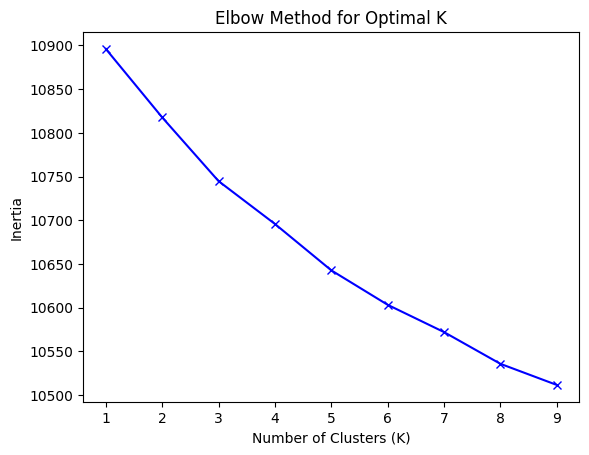

In [ ]:
K = range(1, 10)

X = tfidf_matrix

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Since we are trying to cluster the reviews into Negative, Positive and Neutral, we will use k = 3 to cluster them into 3 different clusters.

We used PCA to reduce the dimensionality and to better visualise each cluster.



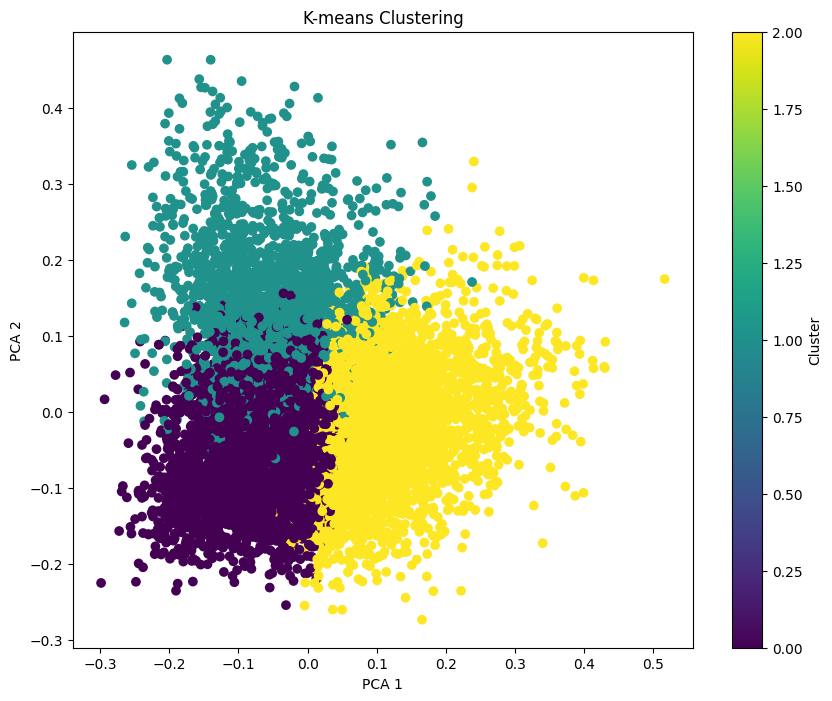

In [ ]:
# Apply K-means clustering with 3 clusters (Positive, Neutral, Negative)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_k['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
clusters = pca.fit_transform(tfidf_matrix.toarray())

# Scatter plot of clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(clusters[:, 0], clusters[:, 1], c=df_k['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

We calculated the average ratings of each cluster and assigned the corresponding sentiment to the cluster based on its average ratings.

In [ ]:
# Average rating for each cluster
cluster_ratings = df_k.groupby('cluster')['rating'].mean().sort_values()
print("Average rating for each cluster:")
print(cluster_ratings)

# Map clusters to sentiment labels based on average ratings
sentiment_map = {}
sentiments = ['Negative', 'Neutral', 'Positive']
for i, cluster in enumerate(cluster_ratings.index):
    sentiment_map[cluster] = sentiments[i]

# Add sentiment labels to the dataframe
df_k['predicted_sentiment'] = df_k['cluster'].map(sentiment_map)

# Compare with true sentiment
if 'true_sentiment' in df_k.columns:
    accuracy = (df_k['predicted_sentiment'] == df_k['true_sentiment']).mean()
    print(f"Accuracy: {accuracy}")

# Calculate number of reviews in each cluster
sentiment_counts = df_k['predicted_sentiment'].value_counts()
print("\nPredicted sentiment distribution:")
print(sentiment_counts)

Average rating for each cluster:
cluster
0    6.821033
1    7.759729
2    9.330609
Name: rating, dtype: float64
Accuracy: 0.5012895460797799

Predicted sentiment distribution:
predicted_sentiment
Negative    5230
Positive    4038
Neutral     2364
Name: count, dtype: int64


We can also find the top terms that occur the most frequently in each cluster to get a sense of the main topic discussed in each cluster.

In [ ]:
def get_top_terms_per_cluster(vectorizer, kmeans, n_terms=10):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()

    cluster_terms = {}
    for i in range(kmeans.n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :n_terms]]
        cluster_terms[i] = top_terms

    return cluster_terms

top_terms = get_top_terms_per_cluster(tfidf_vectorizer, kmeans)
for cluster, terms in top_terms.items():
    sentiment = sentiment_map[cluster]
    print(f"\nCluster {cluster} ({sentiment}):")
    print(", ".join(terms))


Cluster 0 (Negative):
flight, singapore, airlines, service, time, airline, us, one, flights, staff

Cluster 1 (Neutral):
economy, class, business, premium, singapore, seat, seats, flight, airlines, service

Cluster 2 (Positive):
good, flight, food, great, service, singapore, excellent, staff, airlines, comfortable


Lastly, we will use evaluation metrics to evaluate the accuracy, precision, recall and f1 score of the clutering model.

In [ ]:
precision, recall, f1, _ = precision_recall_fscore_support(
    df_k['true_sentiment'],
    df_k['predicted_sentiment'],
    average=None,
    labels=['Negative', 'Neutral', 'Positive']
)

results = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=['Negative', 'Neutral', 'Positive'])

if 'true_sentiment' in df_k.columns:
    accuracy = (df_k['predicted_sentiment'] == df_k['true_sentiment']).mean()
    print(f"Accuracy: {accuracy}\n")
print("Classification Report")
print(results)

Accuracy: 0.5012895460797799

Classification Report
          Precision    Recall  F1-Score
Negative   0.299618  0.791414  0.434674
Neutral    0.174281  0.311413  0.223488
Positive   0.953938  0.462480  0.622948


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_rf = df_model

In [ ]:
# split to train and test
X = df_rf['clean_text']
y = df_rf['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline w random forest
pipeline_rf = make_pipeline(
    TfidfVectorizer(stop_words='english', sublinear_tf=True, min_df=2, max_df=0.9, ngram_range=(1,2)),
    RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
)

# train model
pipeline_rf.fit(X_train, y_train)

# predict and evaluate
y_pred = pipeline_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7872797593467985
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.45      0.59       397
     neutral       1.00      0.00      0.01       263
    positive       0.78      0.99      0.87      1667

    accuracy                           0.79      2327
   macro avg       0.88      0.48      0.49      2327
weighted avg       0.82      0.79      0.73      2327



Even though we try to use "class_weight='balanced'", the scores for predicting neutral ratings is still quite low, and not enough to deal with the imbalance. Model completely fails to correctly classify neutral ratings (recall is 0). So we might still need SMOTE. So we try to run SMOTE along with hyperparameter tuning.

In [ ]:
tfidf = TfidfVectorizer(max_df=0.9, ngram_range=(1, 2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

rf_classifier = RandomForestClassifier(random_state=42)

# hyperparameter tuning with GridSearchCV
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=4, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# predict and evaluate
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Accuracy: 0.8083369144821658
Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.61      0.67       397
     neutral       0.44      0.18      0.25       263
    positive       0.84      0.95      0.89      1667

    accuracy                           0.81      2327
   macro avg       0.67      0.58      0.61      2327
weighted avg       0.78      0.81      0.78      2327



In [ ]:
# Get misclassified samples
misclassified = X_test[(y_pred != y_test)]
df_misclassified = pd.DataFrame({
    'Text': misclassified,
    'True Label': y_test[y_pred != y_test].values,
    'Predicted Label': y_pred[y_pred != y_test]
})

df_misclassified[df_misclassified["True Label"] == "negative"]

,Text,True Label,Predicted Label
245,july flew husband two friends auckland singapo...,negative,positive
10290,boarding smooth welcome drinks offered request...,negative,positive
900,singapore rebooked flight frankfurt departing ...,negative,positive
5399,travelled multiple times sq every time like no...,negative,positive
10338,got say experience flying melbourne singapore ...,negative,neutral
...,...,...,...
2199,flight staff kind helpful however flight singa...,negative,positive
3139,high expectations airline disappointed travel ...,negative,positive
10476,understand people say sq best airline world se...,negative,neutral
8131,took red eye left beijing 1 00 got beijing 6 3...,negative,positive


Achieved an overall high accuracy, with strong performance in classifying positive reviews, but STILL struggling to classify neutral reviews. The model is likely still heavily biased towards predicting positive or negative classes. Despite hyperparameter tuning and SMOTE, the fundamental issue of class imbalance is still there, so RF still doesn't solve the issue well. We can try to carry out feature engineering improvements by using different word embeddings SBERT instead of TF-IDF, which can capture semantic meaning by producing dense vector representations. This might be helpful in predicting neutral reviews, especially given that many of the neutral reviews are getting misclassified as positive ones. Since SBERT is better suited for other models, we will try running a different classifier model, and also look into using Neural Networks such as RNNs.

## Deep Learning and Neural Networks

We also want to test the feasibility of Neural Networks, as they can account for non-linear relationships, and might be better suited to predicting the sentiment of a review.

### Recurrent Neural Networks (RNNs)

#### Simple RNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.utils import class_weight

In [ ]:
df_rnn = df_model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, Dropout
import nlpaug.augmenter.word as naw
from sklearn.metrics import classification_report

# map ratings to sentiment
def categorize_rating(rating):
    if 1 <= rating <= 4:
        return "negative"
    elif 5 <= rating <= 6:
        return "neutral"
    elif 7 <= rating <= 10:
        return "positive"

df_rnn["sentiment"] = df_rnn["rating"].apply(categorize_rating)

label_encoder = LabelEncoder()
df_rnn["label"] = label_encoder.fit_transform(df_rnn["sentiment"])

In [ ]:
# split to training and testing
X_train, X_test, y_train, y_test = train_test_split(df_rnn["clean_text"], df_rnn["label"], test_size=0.2, random_state=42)

# Tokenization & Padding
max_words = 10000  # Vocabulary size
max_len = 100  # Max review length
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

# build the Simple RNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=32, input_length=max_len),
    SimpleRNN(64, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(3, activation="softmax")  # 3 output classes (negative, neutral, positive)
])

# compile the model using adam optimiser
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# predict
predictions = model.predict(X_test_padded)
predicted_labels = np.argmax(predictions, axis=1)

# decode predictions
decoded_predictions = label_encoder.inverse_transform(predicted_labels)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7120 - loss: 0.7808 - val_accuracy: 0.7095 - val_loss: 0.7597
Epoch 2/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7340 - loss: 0.7368 - val_accuracy: 0.7121 - val_loss: 0.7596
Epoch 3/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7738 - loss: 0.6799 - val_accuracy: 0.7056 - val_loss: 0.8082
Epoch 4/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7981 - loss: 0.6150 - val_accuracy: 0.6988 - val_loss: 0.8483
Epoch 5/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7969 - loss: 0.6159 - val_accuracy: 0.7026 - val_loss: 0.8673
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7132 - loss: 0.8435
Test Accuracy: 0.7026
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, predicted_labels, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    negative       0.36      0.13      0.19       397
     neutral       0.12      0.02      0.04       263
    positive       0.74      0.95      0.83      1667

    accuracy                           0.70      2327
   macro avg       0.41      0.37      0.35      2327
weighted avg       0.60      0.70      0.63      2327



#### Long-Short Term Model (LSTM)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

In [ ]:
skyrax_df = pd.read_csv('sample_data/skyrax_reviews.csv')
skyrax_df = skyrax_df[['Overall Rating (/10)', 'Date Published', 'Review', 'Recommended']]
skyrax_df = skyrax_df.copy() # ensure we are not modifying the original df
skyrax_df['sentiment_recommended'] = skyrax_df['Recommended'].apply(lambda x: 1 if x == 'yes' else 0)

# not using 1, 0, -1 as we are using softmax activation function in nn
# softmax is non-negative
def categorize_sentiment(rating):
    if rating >= 8:
        return 2
    elif rating >= 5:
        return 1
    else:
        return 0

skyrax_df['sentiment_rating'] = skyrax_df['Overall Rating (/10)'].apply(categorize_sentiment)
skyrax_df = skyrax_df.drop(columns=['Overall Rating (/10)', 'Recommended'])
skyrax_df = skyrax_df.rename(columns={'Date Published': 'published_date', 'Review': 'review'})
skyrax_df.head(5)

,published_date,review,sentiment_recommended,sentiment_rating
0,2025-02-23,i recently flew in singapore airlines. everyth...,1,2
1,2025-02-05,pretty disappointed on this trip on sq. initia...,0,0
2,2025-02-05,this airline is world class and knows how to t...,1,2
3,2025-02-04,it was our honeymoon and this airline couldn’t...,0,0
4,2025-01-30,i did the automatic 48-hr online check-in. we ...,0,1


In [ ]:
sia_df = pd.read_csv('sample_data/singapore_airlines_reviews.csv')
sia_df['rating'] = sia_df['rating'] * 2
sia_df['published_date'] = pd.to_datetime(sia_df['published_date'], errors='coerce', utc=True)
sia_df['published_date'] = sia_df['published_date'].dt.strftime('%Y-%m-%d')
sia_df = sia_df.rename(columns={'text': 'review'})
sia_df['sentiment_rating'] = sia_df['rating'].apply(categorize_sentiment)
sia_df = sia_df.drop(columns=['rating', 'published_platform', 'type', 'title'])
sia_df.head()

,published_date,review,helpful_votes,sentiment_rating
0,2024-03-12,We used this airline to go from Singapore to L...,0,1
1,2024-03-11,The service on Singapore Airlines Suites Class...,0,2
2,2024-03-11,"Booked, paid and received email confirmation f...",0,0
3,2024-03-11,"Best airline in the world, seats, food, servic...",0,2
4,2024-03-10,Premium Economy Seating on Singapore Airlines ...,0,0


In [ ]:
df = pd.concat([skyrax_df, sia_df], axis=0, ignore_index=True)
df['helpful_votes'] = df['helpful_votes'].fillna(0)
df['sentiment_recommended'] = df.apply(lambda row: 1 if pd.isna(row['sentiment_recommended'])
                                       and row['sentiment_rating'] > 0
                                       else row['sentiment_recommended'], axis=1) # axis=1, can access both columns
df.head()

,published_date,review,sentiment_recommended,sentiment_rating,helpful_votes
0,2025-02-23,i recently flew in singapore airlines. everyth...,1.0,2,0.0
1,2025-02-05,pretty disappointed on this trip on sq. initia...,0.0,0,0.0
2,2025-02-05,this airline is world class and knows how to t...,1.0,2,0.0
3,2025-02-04,it was our honeymoon and this airline couldn’t...,0.0,0,0.0
4,2025-01-30,i did the automatic 48-hr online check-in. we ...,0.0,1,0.0


In [ ]:
import nltk # natural language toolkit
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
'''
Lemmatization reduces a word to its base or root form.
Unlike stemming, which might just chop off suffixes (e.g., "running" becomes "run"),
lemmatization considers the word's meaning and grammar. For example, "better" becomes "good" (not just "bet")

Stopwords are common words that don't add much meaning to a sentence. These include words like "the", "is", "and", "to".
'''

# initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatize
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(clean_text)
df = df.drop(columns='review')

# load the GloVe embeddings (Twitter 200d)
embedding_dim = 200  # GloVe embeddings are 200-dimensional
embedding_index = {}

# load the GloVe word vectors
with open('glove.twitter.27B.200d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

print(f'Loaded {len(embedding_index)} word vectors.')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment_rating'],
                                                    test_size=0.2, random_state=42, stratify=df['sentiment_rating'])

# initialize tokenizer and fit ONLY on training data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# convert training & test reviews into sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# pad the sequences
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=200)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=200)

# create the embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

# populate the embedding matrix with GloVe vectors
for word, i in tokenizer.word_index.items():
    if word in embedding_index:
        embedding_matrix[i] = embedding_index[word]

from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# ensure x_train_pad is a numpy array
X_train_pad = np.array(X_train_pad)

# check actual class distribution
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print(f"original class distribution: {dict(zip(unique_classes, class_counts))}")

# compute more balanced class weights
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(f"class weights: {class_weight_dict}")

# step 1: reduce positive class a bit
under = RandomUnderSampler(sampling_strategy={2: int(class_counts.max() * 0.8)}, random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train_pad, y_train)

# step 2: mild smote oversampling for neutral & negative
smote = SMOTE(sampling_strategy={0: int(class_counts.max() * 0.7), 1: int(class_counts.max() * 0.8)}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_under, y_train_under)

# check new distribution
unique_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
print(f"resampled class distribution: {dict(zip(unique_resampled, counts_resampled))}")

model = Sequential()

# embedding layer with pre-trained GloVe embeddings
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,  # vocabulary size
                    output_dim=embedding_dim,               # GloVe embedding dimension
                    weights=[embedding_matrix],             # load the pre-trained GloVe embeddings
                    input_length=200,                       # max length of the sequences
                    trainable=True))                        # means using GloVe embeddings + fine tune based on data

# LSTM layers
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))                     # dropout for regularization

model.add(LSTM(32))
model.add(Dropout(0.5))

# output layer
model.add(Dense(3, activation='softmax'))  # 3 classes

# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience = 8, restore_best_weights=True)
history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping], class_weight=class_weight_dict)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_pad)  # Get predicted probabilities
y_pred_classes = y_pred.argmax(axis=1)  # Convert to class labels (assuming softmax activation)
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))

#### Bidirectional LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam

# initialize model
model = Sequential()

# embedding layer with pre-trained glove embeddings
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,  # vocabulary size
                    output_dim=embedding_dim,               # glove embedding dimension
                    weights=[embedding_matrix],             # load the pre-trained glove embeddings
                    input_length=200,                       # max sequence length
                    trainable=True))                        # fine-tune glove embeddings

# first bidirectional lstm layer
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))  # regularization
model.add(BatchNormalization())

# second bidirectional lstm layer
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# output layer
model.add(Dense(3, activation='softmax'))  # 3-class classification

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0005),  # slightly reduced lr for stability
              metrics=['accuracy'])

# model summary
model.summary()

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience = 8, restore_best_weights=True)
history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping], class_weight=class_weight_dict)

NameError: name 'embedding_matrix' is not defined

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_pad)  # Get predicted probabilities
y_pred_classes = y_pred.argmax(axis=1)  # Convert to class labels (assuming softmax activation)
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))

### Convolutional Neural Network - Gated Recurrent Unit (CNN-GRU)

In [ ]:
#MODEL 1 (Sequential CNN_GRU)

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GRU, Dense, GlobalMaxPooling1D, concatenate, Dropout

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# load CSV file
sia = siadata

# dataframe
sia_title = pd.DataFrame({'text': sia['text'], 'rating': sia['rating']})

# create a set of default stopwords
default_stopwords = set(stopwords.words('english'))

# define domain-specific stopwords
domain_stopwords = {'economy', 'airlines', 'business', 'premium', 'flight', 'airline', 'flights', 'service', 'food', 'singapore', 'class', 'time'}

# combine the two sets into one custom list
custom_stopwords = default_stopwords.union(domain_stopwords)

lemmatizer = WordNetLemmatizer()

# preprocessing function with lemmatization and domain-specific stopwords removal
def preprocess_text(text):
    # remove punctuation and non-letter characters (except apostrophes)
    text = re.sub(r"[^\w\s']", "", text)
    # convert to lower case
    text = text.lower()
    # tokenize text into words
    tokens = text.split()
    # remove custom stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in custom_stopwords]
    return ' '.join(tokens)

# apply preprocessing to the text column in the df
sia_title['text_clean'] = sia_title['text'].apply(preprocess_text)

print("Sample cleaned text:")
print(sia_title['text_clean'].iloc[0])

# map ratings to sentiment categories
rating_map = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2, 10: 2}
sia_title['rating'] = sia_title['rating'].map(rating_map)

# tokenize all the data
tokenizer = Tokenizer(num_words=10000, oov_token="<UNK>")  # Add OOV token
tokenizer.fit_on_texts(sia_title['text_clean'])
sequences = tokenizer.texts_to_sequences(sia_title['text_clean'])

# max_len based on all the data
lengths = [len(seq) for seq in sequences]
max_len = int(np.percentile(lengths, 95))

# pad all the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# split into training and test sets
data_train, data_test, y_train, y_test = train_test_split(
    padded_sequences,
    sia_title['rating'],
    test_size=0.25,
    random_state=2025,
    stratify=sia_title['rating']
)

print("Training data shape before oversampling:", data_train.shape)
print("Testing data shape:", data_test.shape)

# SMOTE on training data 1
smote = SMOTE(sampling_strategy={1: int(sum(y_train == 2))}, random_state=23)
data_train_smote, y_train_smote = smote.fit_resample(data_train, y_train)

print("Training data shape after SMOTE oversampling:", data_train_smote.shape)

# convert y_train_smote and y_test to numpy arrays
y_train_smote = np.array(y_train_smote)
y_test = np.array(y_test)

# CNN-GRU model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GRU, concatenate, Dense, Dropout

def build_cnn_gru(vocab_size, embedding_dim, max_len,
                  filters=96, kernel_size=3, gru_units=64):
    inputs = Input(shape=(max_len,))
    x = Embedding(vocab_size, embedding_dim)(inputs)

    # CNN
    conv = Conv1D(filters, kernel_size, activation='relu')(x)

    # Use MaxPooling1D to maintain sequence structure
    # Adjust pool_size based on your needs
    pooled = MaxPooling1D(pool_size=2)(conv)

    # GRU
    gru = GRU(gru_units)(pooled)

    # Dense layers for classification
    dense = Dense(128, activation='relu')(gru)
    dropout = Dropout(0.3)(dense)
    outputs = Dense(3, activation='softmax')(dropout)  # Output layer

    return Model(inputs, outputs)

# Model instantiation
vocab_size = 10000  # Size of vocabulary
embedding_dim = 128

model = build_cnn_gru(vocab_size=vocab_size,
                      embedding_dim=embedding_dim,
                      max_len=max_len)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use this for integer labels
              metrics=['accuracy'])

print(model.summary())

# Training the Model
epochs = 10
batch_size = 32

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(data_train_smote,
                    y_train_smote,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[early_stopping])

# Evaluate the Model on Test Data (unbalanced test set)
loss, accuracy = model.evaluate(data_test, y_test)
print('Test Accuracy:', accuracy)

# Predictions and Metrics Evaluation
y_pred_probs = model.predict(data_test)  # Probabilities for each class
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted class labels

print(classification_report(y_test, y_pred_classes))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample cleaned text:
used go london heathrow issue ticket cancelled one ticket trying get sorted cost lot money due roaming charge lengthy phone call needed get ticket reinstated trying charge varying amount resolve poor got airport check desk due issue meant online check done spacious two seat either side plane 3 seat middle plane seemed relatively new brand new legroom good seat wider bigger arm rest two seat fold away tray table good choice movie thing tv show game etc ok seem much different standard crew seemed friendly enough really go isle drink maybe twice whole 1314 hour would done quite often overall ok seat comfy legroom good ok crew could attentive especially would expect slightly better
Training data shape before oversampling: (7500, 128)
Testing data shape: (2500, 128)
Training data shape after SMOTE oversampling: (11879, 128)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ (None, 128, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 126, 96)        │        36,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        31,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356,771 (5.18 MB)

 Trainable params: 1,356,771 (5.18 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5364 - loss: 0.9142 - val_accuracy: 0.7231 - val_loss: 0.6578
Epoch 2/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7762 - loss: 0.5502 - val_accuracy: 0.9057 - val_loss: 0.2981
Epoch 3/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9085 - loss: 0.2747 - val_accuracy: 0.9099 - val_loss: 0.2945
Epoch 4/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9598 - loss: 0.1236 - val_accuracy: 0.8965 - val_loss: 0.3487
Epoch 5/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9791 - loss: 0.0712 - val_accuracy: 0.8788 - val_loss: 0.4818
Epoch 6/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9926 - loss: 0.0249 - val_accuracy: 0.8838 - val_loss: 0.5926
Epoch 7/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9965 - loss: 0.0146 - val_accuracy: 0.8241 - val_loss: 0.9970
Epoch 8/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9968 - loss: 0.0128 - val_ac

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


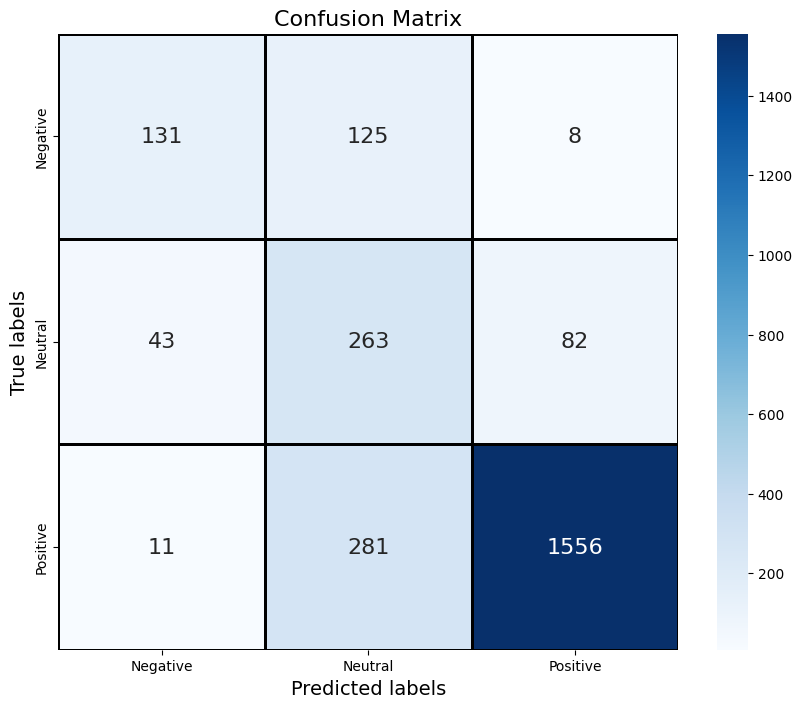

Confusion Matrix:
 [[ 131  125    8]
 [  43  263   82]
 [  11  281 1556]]


In [ ]:
#Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define class labels based on rating_map
class_labels = ["Negative", "Neutral", "Positive"]  # Assuming 0 = Negative, 1 = Neutral, 2 = Positive

# Get predictions
y_pred_classes = np.argmax(model.predict(data_test), axis=1)

# Compute confusion matrix and convert to NumPy array
conf_mat = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={"size": 16}, linewidths=1, linecolor='black')  # Bigger font & grid lines

plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()
print("Confusion Matrix:\n", conf_mat)

In [ ]:
#SCNNGRU RandomSearch for Hyperparameter Tuning
!pip install keras_tuner
import keras_tuner as kt
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score

def build_model_corr(hp):
    inputs = tf.keras.Input(shape=(max_len,))
    x = tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=hp.Int('embedding_dim', min_value=64, max_value=256, step=64)
    )(inputs)

    conv = tf.keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Int('kernel_size', min_value=3, max_value=7, step=2),
        activation='relu'
    )(x)

    pooled = tf.keras.layers.MaxPooling1D(pool_size=hp.Int('pool_size', min_value=2, max_value=3, step=1))(conv)

    gru = tf.keras.layers.GRU(units=hp.Int('gru_units', min_value=32, max_value=128, step=32))(pooled)

    dense = tf.keras.layers.Dense(128, activation='relu')(gru)
    dropout = tf.keras.layers.Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.5, step=0.2))(dense)

    outputs = tf.keras.layers.Dense(3, activation='softmax')(dropout) #more than one output

    modelcorr = tf.keras.Model(inputs, outputs)

    modelcorr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return modelcorr

tunercorr2 = kt.RandomSearch(
    build_model_corr,
    objective='val_accuracy',
    max_trials=30,
    executions_per_trial=3,
    directory='my_dir',
    project_name='cnn_gru_tuning_corr2'
)

tunercorr2.search(data_train_smote, y_train_smote, epochs=10, validation_split=0.2)
best_hps_c2 = tunercorr2.get_best_hyperparameters(num_trials=1)[0]


In [ ]:
#best hyperparameters for each trial run
print("Best Hyperparameters:")
print(f"Embedding Dimension: {best_hps_c2.get('embedding_dim')}")
print(f"Number of Filters: {best_hps_c2.get('filters')}")
print(f"Kernel Size: {best_hps_c2.get('kernel_size')}")
print(f"pool size: {best_hps_c2.get('pool_size')}")
print(f"GRU Units: {best_hps_c2.get('gru_units')}")
print(f"Dropout Rate: {best_hps_c2.get('dropout_rate')}")

for trial in tunercorr2.oracle.trials.values():
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Score: {trial.score}")
    print("-" * 50)

In [ ]:
#MODEL 2 (PARALLEL CNN GRU MODEL): USING SMOTE on class=1.

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GRU, Dense, GlobalMaxPooling1D, concatenate, Dropout

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# load CSV file
sia = siadata

# dataframe
sia_title = pd.DataFrame({'text': sia['text'], 'rating': sia['rating']})

# create a set of default stopwords
default_stopwords = set(stopwords.words('english'))

# define domain-specific stopwords
domain_stopwords = {'economy', 'airlines', 'business', 'premium', 'flight', 'airline', 'flights', 'service', 'food', 'singapore', 'class', 'time'}

# combine the two sets into one custom list
custom_stopwords = default_stopwords.union(domain_stopwords)

lemmatizer = WordNetLemmatizer()

# preprocessing function with lemmatization and domain-specific stopwords removal
def preprocess_text(text):
    # remove punctuation and non-letter characters (except apostrophes)
    text = re.sub(r"[^\w\s']", "", text)
    # convert to lower case
    text = text.lower()
    # tokenize text into words
    tokens = text.split()
    # remove custom stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in custom_stopwords]
    return ' '.join(tokens)

# apply preprocessing to the text column in the df
sia_title['text_clean'] = sia_title['text'].apply(preprocess_text)

print("Sample cleaned text:")
print(sia_title['text_clean'].iloc[0])

# map ratings to sentiment categories
rating_map = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2, 10: 2}
sia_title['rating'] = sia_title['rating'].map(rating_map)

# tokenize all the data
tokenizer = Tokenizer(num_words=10000, oov_token="<UNK>")  # Add OOV token
tokenizer.fit_on_texts(sia_title['text_clean'])
sequences = tokenizer.texts_to_sequences(sia_title['text_clean'])

# max_len based on all the data
lengths = [len(seq) for seq in sequences]
max_len = int(np.percentile(lengths, 95))

# pad all the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# split into training and test sets
data_train, data_test, y_train, y_test = train_test_split(
    padded_sequences,
    sia_title['rating'],
    test_size=0.25,
    random_state=2025,
    stratify=sia_title['rating']
)

print("Training data shape before oversampling:", data_train.shape)
print("Testing data shape:", data_test.shape)

# oversample minority classes using SMOTE on training data 1
smote = SMOTE(sampling_strategy={1: int(sum(y_train == 2))}, random_state=23)
data_train_smote, y_train_smote = smote.fit_resample(data_train, y_train)

print("Training data shape after SMOTE oversampling:", data_train_smote.shape)

# convert y_train_smote and y_test to numpy arrays
y_train_smote = np.array(y_train_smote)
y_test = np.array(y_test)

# CNN-GRU model
def build_cnn_gru(vocab_size, embedding_dim, max_len,
                  filters=128, kernel_size=3, gru_units=64):
    inputs = Input(shape=(max_len,))
    x = Embedding(vocab_size, embedding_dim)(inputs)

    # CNN
    conv = Conv1D(filters, kernel_size, activation='relu')(x)
    pooled = GlobalMaxPooling1D()(conv)

    # GRU
    gru = GRU(gru_units)(x)

    # Combine CNN and GRU outputs
    combined = concatenate([pooled, gru])

    # Dense layers for classification
    dense = Dense(128, activation='relu')(combined)
    dropout = Dropout(0.5)(dense)
    outputs = Dense(3, activation='softmax')(dropout)  # Output layer

    return Model(inputs, outputs)

# Model instantiation
vocab_size = 10000  # Size of vocabulary
embedding_dim = 256

model = build_cnn_gru(vocab_size=vocab_size,
                      embedding_dim=embedding_dim,
                      max_len=max_len)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use this for integer labels
              metrics=['accuracy'])

print(model.summary())

# Training the Model
epochs = 10
batch_size = 32

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(data_train_smote,
                    y_train_smote,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[early_stopping])

# Evaluate the Model on Test Data (unbalanced test set)
loss, accuracy = model.evaluate(data_test, y_test)
print('Test Accuracy:', accuracy)

# Predictions and Metrics Evaluation
y_pred_probs = model.predict(data_test)  # Probabilities for each class
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted class labels

print(classification_report(y_test, y_pred_classes))


In [ ]:
#Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define class labels based on rating_map
class_labels = ["Negative", "Neutral", "Positive"]  # Assuming 0 = Negative, 1 = Neutral, 2 = Positive

# Get predictions
y_pred_classes = np.argmax(model.predict(data_test), axis=1)

# Compute confusion matrix and convert to NumPy array
conf_mat = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={"size": 16}, linewidths=1, linecolor='black')  # Bigger font & grid lines

plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

In [ ]:
print("Confusion Matrix:\n", conf_mat)


In [ ]:
#PCNNGRU RandomSearch for Hyperparameter Tuning
import keras_tuner as kt

def build_model0(hp):
    inputs = tf.keras.Input(shape=(max_len,))
    x = tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=hp.Int('embedding_dim', min_value=64, max_value=256, step=64)
    )(inputs)

    conv = tf.keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Int('kernel_size', min_value=3, max_value=7, step=2),
        activation='relu'
    )(x)

    pooled = tf.keras.layers.GlobalMaxPooling1D()(conv)

    gru = tf.keras.layers.GRU(units=hp.Int('gru_units', min_value=32, max_value=128, step=32))(x)

    combined = tf.keras.layers.concatenate([pooled, gru])

    dense = tf.keras.layers.Dense(128, activation='relu')(combined)
    dropout = tf.keras.layers.Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.5, step=0.2))(dense)

    outputs = tf.keras.layers.Dense(3, activation='softmax')(dropout)

    model = tf.keras.Model(inputs, outputs)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

tuner0 = kt.RandomSearch(
    build_model0,
    objective='val_accuracy',
    max_trials=30,
    executions_per_trial=3,
    directory='my_dir',
    project_name='cnn_gru_tuning0'
)

tuner0.search(data_train_smote, y_train_smote, epochs=10, validation_split=0.2)
best_hps0 = tuner0.get_best_hyperparameters(num_trials=1)[0]


In [ ]:
#all trial outcomes
for trial in tuner0.oracle.trials.values():
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Score: {trial.score}")
    print("-" * 50)


# Topic Modelling

We want to deduce specific topics that customers talk about in their reviews by doing aspect-based sentiment analysis using both tradional (VADER) and transformer-based (DistilBERT) methods. We will perform topic modelling and review sorting to surface the most impactful negative feedback.

So first we import the necessary libraries need for this section.

In [ ]:
!pip install gensim


In [ ]:
#!pip install --upgrade --force-reinstall numpy
#!pip install --upgrade --force-reinstall gensim

In [ ]:
import spacy
from transformers import pipeline
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
import re
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Do some preprocessing for the text data which includes creating stopwords, a lemmatizer, ensuring text has no punctuation, and is in lower case.

In [ ]:
# Create a set of default stopwords
nltk.download('wordnet')
nltk.download('stopwords')
default_stopwords = set(stopwords.words('english'))

# Add domain-specific words
domain_stopwords = {'flight', 'flights', 'airline', 'airlines', 'singapore', 'service', 'class', 'time', 'food', 'premium', 'economy'}
custom_stopwords = default_stopwords.union(domain_stopwords)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    text = re.sub(r"[^\w\s']", "", text)  # Remove punctuation but keep apostrophes
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in custom_stopwords]
    return ' '.join(tokens)

# Apply preprocessing
siadata_alpha = siadata['text'].apply(preprocess_text)

# Preview result
print("Cleaned text with domain-specific stopwords removed:")
print(siadata_alpha.iloc[0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaned text with domain-specific stopwords removed:
used go london heathrow issue ticket cancelled one ticket trying get sorted cost lot money due roaming charge lengthy phone call needed get ticket reinstated trying charge varying amount resolve poor got airport check desk due issue meant online check done spacious two seat either side plane 3 seat middle plane seemed relatively new brand new legroom good seat wider bigger arm rest two seat fold away tray table good choice movie thing tv show game etc ok seem much different standard crew seemed friendly enough really go isle drink maybe twice whole 1314 hour would done quite often overall ok seat comfy legroom good ok crew could attentive especially would expect slightly better


Separate text data into two parts, postive (rating >=3) and negative (rating <3) and use that data to do topic modelling.

In [ ]:
documents_positive = siadata_alpha[siadata['rating'] >= 3].tolist()
documents_negative = siadata_alpha[siadata['rating'] < 3].tolist()

Use NMF for topic modeling.

In [ ]:
vectorizer_positive = TfidfVectorizer(ngram_range=(2, 3), max_df=0.8, min_df=2)
doc_term_matrix_positive = vectorizer_positive.fit_transform(documents_positive)

vectorizer_negative = TfidfVectorizer(ngram_range=(2, 3), max_df=0.8, min_df=2)
doc_term_matrix_negative = vectorizer_negative.fit_transform(documents_negative)

def display_nmf_topics(model, feature_names, no_top_words=7):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(f"\nTopic {topic_idx}:\n - " + "\n - ".join(words))
    return topics

# Define the number of topics
num_topics = 10

# Create and fit the NMF model for positive reviews
nmf_positive = NMF(n_components=num_topics, init='nndsvd', random_state=42)
nmf_positive.fit(doc_term_matrix_positive)

# Create and fit the NMF model for negative reviews
nmf_negative = NMF(n_components=num_topics, init='nndsvd', random_state=42)
nmf_negative.fit(doc_term_matrix_negative)

# Display topics for positive reviews
print("NMF Topics for Positive Reviews:")
topics_positive_nmf = display_nmf_topics(nmf_positive, vectorizer_positive.get_feature_names_out(), no_top_words=10)
for topic in topics_positive_nmf:
    print(topic)

# Display topics for negative reviews
print("\nNMF Topics for Negative Reviews:")
topics_negative_nmf = display_nmf_topics(nmf_negative, vectorizer_negative.get_feature_names_out(), no_top_words=10)
for topic in topics_negative_nmf:
    print(topic)

NMF Topics for Positive Reviews:

Topic 0:
 - one best
 - comfortable seat
 - entertainment system
 - best world
 - changi airport
 - good entertainment
 - seat good
 - one best world
 - new zealand
 - best ever

Topic 1:
 - nothing much
 - much trouble
 - nothing much trouble
 - friendly nothing
 - friendly nothing much
 - helpful nothing much
 - helpful nothing
 - crew nothing much
 - crew nothing
 - attentive nothing much

Topic 2:
 - cabin crew
 - crew attentive
 - cabin crew attentive
 - crew friendly
 - cabin crew friendly
 - excellent cabin
 - excellent cabin crew
 - friendly cabin
 - friendly cabin crew
 - great cabin crew

Topic 3:
 - highly recommend
 - would highly
 - would highly recommend
 - recommend flying
 - highly recommend flying
 - recommend would
 - flown would
 - top notch
 - people first
 - highly recommend travelling

Topic 4:
 - leg room
 - extra leg
 - extra leg room
 - plenty leg room
 - room seat
 - plenty leg
 - leg room seat
 - leg room great
 - room great


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


To evaluate whether the topics generated are coherent and make sense, we will use Coherence and Perplexity scores. What we are trying to achieve is a high coherence score and a low perplexity score.

In [ ]:
documents = siadata_alpha.tolist()
vectorizer = TfidfVectorizer(max_df=0.75, min_df=3)
tfidf_matrix = vectorizer.fit_transform(documents)

# Function to calculate coherence score
def calculate_coherence_score(model, texts, dictionary, corpus):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_terms = [dictionary[i] for i in topic.argsort()[:-11:-1]]
        topics.append(topic_terms)
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Function to calculate perplexity score
def calculate_perplexity_score(model, doc_term_matrix):
    reconstruction_err = model.reconstruction_err_
    perplexity = np.exp(reconstruction_err / doc_term_matrix.sum())
    return perplexity

# Prepare data for coherence score calculation
texts = [doc.split() for doc in documents]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define the range of topics to evaluate
topic_range = range(2, 61, 2)  # Increased topic range
coherence_scores = []
perplexity_scores = []

for num_topics in topic_range:
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(tfidf_matrix)

    coherence_score = calculate_coherence_score(nmf_model, texts, dictionary, corpus)
    coherence_scores.append(coherence_score)

    perplexity_score = calculate_perplexity_score(nmf_model, tfidf_matrix)
    perplexity_scores.append(perplexity_score)

# Plot coherence and perplexity scores
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color=color)
ax1.plot(topic_range, coherence_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Perplexity Score', color=color)
ax2.plot(topic_range, perplexity_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Coherence and Perplexity Scores for NMF')
plt.show()


As seen from the graph, there are some fluctuations for the coherence score while the perplexity score steadily goes down. Just basing of the highest peak of coherence score, we can see that it happened right before 20 topics. It is hard to see from the graph the exact number of topics that is optimal so we will perform a gridsearch between 15 and 25 topics.

In [ ]:
def compute_coherence(topic_term_matrix, feature_names, documents, top_n=10):
    """
    Compute c_v topic coherence for an NMF topic-term matrix using gensim.

    Parameters:
    -----------
    - topic_term_matrix: np.array of shape [n_topics, n_features]
      Each row is a topic; each column is a term weight.
    - feature_names: list or array of the actual token strings (length = n_features)
    - documents: list of raw text documents (strings) that were used to fit vectorizer
    - top_n: int, how many top words per topic to use in computing coherence

    Returns:
    --------
    - float: the average c_v coherence across all topics
    """
    # 1) Identify top words for each topic
    topics = []
    for row in topic_term_matrix:
        # Get indices of the highest-weight words
        top_indices = row.argsort()[-top_n:]
        top_words = [feature_names[i] for i in top_indices]
        topics.append(top_words)

    # 2) Tokenize each document (simple split on whitespace, or your own tokenizer)
    tokenized_docs = [doc.split() for doc in documents]

    # 3) Gensim dictionary and corpus
    dictionary = Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_docs]

    # 4) Create Gensim CoherenceModel
    coherence_model = CoherenceModel(
        topics=topics,
        texts=tokenized_docs,
        dictionary=dictionary,
        corpus=corpus,
        coherence='c_v'
    )

    # 5) Return the coherence score
    return coherence_model.get_coherence()

def custom_topic_score(estimator, X):
    """
    Custom scoring that returns the topic coherence for an NMF model within our pipeline.
    The pipeline has two steps: ('tfidf', TfidfVectorizer), ('nmf', NMF).

    Parameters:
    -----------
    - estimator: a pipeline object (tfidf + nmf) that has been fit
    - X: the original documents used in this fold of cross-validation (list of strings)

    Returns:
    --------
    - float: the coherence score (higher is better)
    """
    nmf_model = estimator.named_steps['nmf']
    tfidf_model = estimator.named_steps['tfidf']

    # Get the topic-term matrix: shape = [n_topics, n_features]
    topic_term_matrix = nmf_model.components_
    # Get the feature names (all tokens/words)
    feature_names = tfidf_model.get_feature_names_out()

    # Compute topic coherence
    coherence = compute_coherence(topic_term_matrix, feature_names, X, top_n=10)
    return coherence

# -----------------------------
# 4. Build the pipeline
# -----------------------------
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),     # We will tune max_df, min_df, etc.
    ('nmf', NMF(random_state=42,      # We can tune n_components here, too
                init='nndsvd',
                max_iter=300))
])

# -----------------------------
# 5. Define the parameter grid
# -----------------------------
param_grid = {
    'tfidf__max_df': [0.7, 0.8, 0.9],
    'tfidf__min_df': [2, 3, 5],
    'nmf__n_components': list(range(15, 25))
}

# -----------------------------
# 6. GridSearchCV with custom score
# -----------------------------
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=custom_topic_score,  # Use our custom coherence-based function
    cv=3,                        # 3-fold cross-validation
    verbose=1                 # Use all available cores
)

# -----------------------
# 4) Grid search on positive reviews
# -----------------------
grid_search_positive = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring=custom_topic_score
)
grid_search_positive.fit(documents_positive)

print("=== Best Params (Positive) ===")
print(grid_search_positive.best_params_)
print("Best Coherence Score:", grid_search_positive.best_score_)

# Extract best pipeline and model
best_pipeline_positive = grid_search_positive.best_estimator_
best_tfidf_positive = best_pipeline_positive.named_steps['tfidf']
best_nmf_positive = best_pipeline_positive.named_steps['nmf']

# -----------------------
# 5) Display the topics for positive
# -----------------------
feature_names_pos = best_tfidf_positive.get_feature_names_out()
topic_term_matrix_pos = best_nmf_positive.components_

def display_topics(topic_term_matrix, feature_names, no_top_words=10):
    for idx, topic_vector in enumerate(topic_term_matrix):
        top_indices = topic_vector.argsort()[-no_top_words:]
        top_words = [feature_names[i] for i in top_indices]
        print(f"\nTopic {idx}: {', '.join(top_words)}")

print("=== Topics for Positive Reviews ===")
display_topics(topic_term_matrix_pos, feature_names_pos)

# -----------------------
# 6) Grid search on negative reviews
# -----------------------
grid_search_negative = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring=custom_topic_score
)
grid_search_negative.fit(documents_negative)

print("\n=== Best Params (Negative) ===")
print(grid_search_negative.best_params_)
print("Best Coherence Score:", grid_search_negative.best_score_)

# Extract best pipeline and model for negative
best_pipeline_negative = grid_search_negative.best_estimator_
best_tfidf_negative = best_pipeline_negative.named_steps['tfidf']
best_nmf_negative = best_pipeline_negative.named_steps['nmf']

# -----------------------
# 7) Display the topics for negative
# -----------------------
feature_names_neg = best_tfidf_negative.get_feature_names_out()
topic_term_matrix_neg = best_nmf_negative.components_

print("=== Topics for Negative Reviews ===")
display_topics(topic_term_matrix_neg, feature_names_neg)

Looking at the results, we can see that 15 topics is the sweet spot with 0.7 max_df and 3 min_df.

We can plot down coherence score results from the gridsearch on a graph to see how well it performed.

In [ ]:
import matplotlib.pyplot as plt

coherence_scores = grid_search_positive.cv_results_['mean_test_score']
topic_counts = grid_search_positive.cv_results_['param_nmf__n_components'].data

plt.figure(figsize=(8, 5))
plt.plot(topic_counts, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics (Positive Reviews)')
plt.grid(True)
plt.show()

Now let's take a look at the topic themselves and assign labels that best suit them.

#### Negative Sentiment
Topics 1 and 7 talk about tickets and fees. This means that there might be ticketing, fare and refund issues.

Topics 6 and 10 can be customer support and communication as it had words such as phone, email, call, customer, asked, staff, and check.

Topic 0 could be about flight delays and missed connections.

Topic 3 could be directly related to baggage handling.

Topics 2 and 12 are seating and comfort issues.

Topics 9 and 14 could be about dissapointment towards premium experience.

Finally topics 10 and 13 are about staff and service complaints.

#### Positive Sentiment
Topics 4 and 5 talks about the cabin crew and the overall service.

Topics 2 and 11 are about comfortable seating and cabin space.

Topics 1, 3 and 10 all mention about the in-flight entertainment.

Topics 8 and 10 mention food and beverages.

Topic 14 could be indicating satisfaction towards premium experience.

Topics 6, 7 and 12 are general positive sentiments which could indicate brand loyalty.


So in total we have 7 topics for negative reviews and 6 for positive reviews.


In [ ]:
# Download required resources
nltk.download('vader_lexicon')

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# -----------------------------
# Updated aspect keyword dictionaries
# -----------------------------

# 🔴 Negative Reviews: Distilled Aspects
aspect_keywords_negative = {
    "Ticketing, Fare & Refund Issues": ["ticket", "refund", "booking", "cancelled", "paid", "payment", "money", "change", "credit", "fare"],
    "Customer Support & Communication": ["contact", "phone", "email", "call", "support", "number", "response", "message"],
    "Flight Delays & Missed Connections": ["delayed", "delay", "missed", "connection", "layover", "hour", "wait", "late", "reschedule", "transit"],
    "Baggage Handling": ["baggage", "suitcase", "luggage", "bag", "damaged", "lost", "delayed", "missing", "arrived", "clothes"],
    "Seating & Comfort Issues": ["seat", "legroom", "row", "uncomfortable", "tight", "space", "room", "middle", "cramped", "window"],
    "Premium Experience Disappointment": ["business", "class", "upgrade", "lounge", "bed", "flat", "suite", "priority", "gold", "amenity"],
    "Staff & Service Complaints": ["rude", "staff", "crew", "help", "told", "asked", "boarding", "attitude", "service", "ignored"]
}

# 🟢 Positive Reviews: Distilled Aspects
aspect_keywords_positive = {
    "Cabin Crew & Service Excellence": ["cabin", "crew", "attentive", "professional", "friendly", "helpful", "polite", "staff", "service", "efficient"],
    "Comfortable Seating & Cabin Space": ["seat", "comfortable", "legroom", "spacious", "extra", "space", "room", "a380", "plenty"],
    "In-Flight Entertainment": ["entertainment", "movie", "screen", "selection", "inflight", "system", "choice", "tv"],
    "Food & Beverage Quality": ["meal", "food", "snack", "beverage", "drink", "served", "hot", "breakfast", "choice", "quality"],
    "Premium Experience Satisfaction": ["business", "suite", "first", "bed", "flat", "lounge", "premium", "class", "amenity"],
    "Loyalty & Brand Affinity": ["always", "fly", "recommend", "best", "experience", "amazing", "world", "never", "satisfaction"]
}

# -----------------------------
# Utility Functions
# -----------------------------

def extract_aspect_sentences(doc, keywords):
    doc_spacy = nlp(doc)
    return [sent.text for sent in doc_spacy.sents if any(keyword.lower() in sent.text.lower() for keyword in keywords)]

def get_aspect_sentiment(doc, keywords):
    aspect_sentences = extract_aspect_sentences(doc, keywords)
    if not aspect_sentences:
        return None
    scores = [sia.polarity_scores(sent)['compound'] for sent in aspect_sentences]
    return np.mean(scores)

def compute_aspect_sentiments(documents, aspect_keywords):
    aspect_scores = {aspect: [] for aspect in aspect_keywords}
    for doc in documents:
        for aspect, keywords in aspect_keywords.items():
            sentiment = get_aspect_sentiment(doc, keywords)
            if sentiment is not None:
                aspect_scores[aspect].append(sentiment)
    return {aspect: np.mean(scores) if scores else None for aspect, scores in aspect_scores.items()}

# -----------------------------
# Run Sentiment Analysis
# -----------------------------

documents_positive_SA = siadata[siadata['rating'] >= 3]['text'].tolist()
documents_negative_SA = siadata[siadata['rating'] < 3]['text'].tolist()

neg_aspect_sentiments = compute_aspect_sentiments(documents_negative_SA, aspect_keywords_negative)
df_neg_aspects_vader = pd.DataFrame(list(neg_aspect_sentiments.items()), columns=["Aspect", "Average Sentiment"])
print("Negative Review Aspect Sentiments:")
print(df_neg_aspects_vader)

pos_aspect_sentiments = compute_aspect_sentiments(documents_positive_SA, aspect_keywords_positive)
df_pos_aspects_vader = pd.DataFrame(list(pos_aspect_sentiments.items()), columns=["Aspect", "Average Sentiment"])
print("\nPositive Review Aspect Sentiments:")
print(df_pos_aspects_vader)


In [ ]:
from transformers import pipeline as sentiment_pipeline # rename the pipeline function

# Load the transformer sentiment analysis model (DistilBERT fine-tuned on SST-2) using PyTorch backend
sentiment_analyzer = sentiment_pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", framework="pt")

# -----------------------------
# Updated Aspect Keywords
# -----------------------------

# 🟢 Positive Aspects (distilled & aligned with topics)
aspect_keywords_positive = {
    "Cabin Crew & Service Excellence": ["cabin", "crew", "attentive", "professional", "friendly", "helpful", "polite", "staff", "service", "efficient"],
    "Comfortable Seating & Cabin Space": ["seat", "comfortable", "legroom", "spacious", "extra", "space", "room", "a380", "plenty"],
    "In-Flight Entertainment": ["entertainment", "movie", "screen", "selection", "inflight", "system", "choice", "tv"],
    "Food & Beverage Quality": ["meal", "food", "snack", "beverage", "drink", "served", "hot", "breakfast", "choice", "quality"],
    "Premium Experience Satisfaction": ["business", "suite", "first", "bed", "flat", "lounge", "premium", "class", "amenity"],
    "Loyalty & Brand Affinity": ["always", "fly", "recommend", "best", "experience", "amazing", "world", "never", "satisfaction"]
}

# 🔴 Negative Aspects (distilled & aligned with topics)
aspect_keywords_negative = {
    "Ticketing, Fare & Refund Issues": ["ticket", "refund", "booking", "cancelled", "paid", "payment", "money", "change", "credit", "fare"],
    "Customer Support & Communication": ["contact", "phone", "email", "call", "support", "number", "response", "message"],
    "Flight Delays & Missed Connections": ["delayed", "delay", "missed", "connection", "layover", "hour", "wait", "late", "reschedule", "transit"],
    "Baggage Handling": ["baggage", "suitcase", "luggage", "bag", "damaged", "lost", "delayed", "missing", "arrived", "clothes"],
    "Seating & Comfort Issues": ["seat", "legroom", "row", "uncomfortable", "tight", "space", "room", "middle", "cramped", "window"],
    "Premium Experience Disappointment": ["business", "class", "upgrade", "lounge", "bed", "flat", "suite", "priority", "gold", "amenity"],
    "Staff & Service Complaints": ["rude", "staff", "crew", "help", "told", "asked", "boarding", "attitude", "service", "ignored"]
}

# -----------------------------
# Utility Functions
# -----------------------------

def extract_aspect_sentences(doc, keywords):
    """
    Extract sentences from a document that contain any of the specified keywords.
    """
    doc_spacy = nlp(doc)
    return [sent.text for sent in doc_spacy.sents if any(keyword.lower() in sent.text.lower() for keyword in keywords)]

def get_transformer_sentiment(sent):
    """
    Get sentiment score using DistilBERT. Returns compound-like score (POSITIVE = +score, NEGATIVE = -score).
    """
    result = sentiment_analyzer(sent, truncation=True, max_length=512)[0]
    label = result['label']
    score = result['score']
    return score if label.upper() == "POSITIVE" else -score

def get_aspect_sentiment_transformer(doc, keywords):
    aspect_sentences = extract_aspect_sentences(doc, keywords)
    if not aspect_sentences:
        return None
    scores = [get_transformer_sentiment(sent) for sent in aspect_sentences]
    return np.mean(scores)

def compute_aspect_sentiments_transformer(documents, aspect_keywords):
    aspect_scores = {aspect: [] for aspect in aspect_keywords}
    for doc in documents:
        for aspect, keywords in aspect_keywords.items():
            sentiment = get_aspect_sentiment_transformer(doc, keywords)
            if sentiment is not None:
                aspect_scores[aspect].append(sentiment)
    return {aspect: np.mean(scores) if scores else None for aspect, scores in aspect_scores.items()}

# -----------------------------
# Compute Transformer-based Sentiments
# -----------------------------

# Positive Reviews
pos_aspect_sentiments = compute_aspect_sentiments_transformer(documents_positive_SA, aspect_keywords_positive)
df_pos_aspects = pd.DataFrame(list(pos_aspect_sentiments.items()), columns=["Aspect", "Average Sentiment"])
print("Transformer-based Aspect Sentiments (Positive Reviews):")
print(df_pos_aspects)

# Negative Reviews
neg_aspect_sentiments = compute_aspect_sentiments_transformer(documents_negative_SA, aspect_keywords_negative)
df_neg_aspects = pd.DataFrame(list(neg_aspect_sentiments.items()), columns=["Aspect", "Average Sentiment"])
print("\nTransformer-based Aspect Sentiments (Negative Reviews):")
print(df_neg_aspects)


In [ ]:
df_neg_aspects.sort_values("Average Sentiment").plot.barh(x="Aspect", y="Average Sentiment", title="Negative Aspect Sentiment")
df_pos_aspects.sort_values("Average Sentiment").plot.barh(x="Aspect", y="Average Sentiment", title="Positive Aspect Sentiment")
plt.tight_layout()

In [ ]:
def extract_and_sort_reviews_by_aspect(documents, aspect_keywords, sentiment_func):
    """
    Extract and sort reviews for each aspect based on sentiment.

    Args:
        documents (list): List of original text reviews.
        aspect_keywords (dict): Dictionary with aspect names as keys and keyword lists as values.
        sentiment_func (function): Function to compute sentiment for a sentence.

    Returns:
        dict: Aspect-wise sorted list of (sentence, sentiment score).
    """
    aspect_reviews = {}
    for aspect, keywords in aspect_keywords.items():
        reviews = []
        for doc in documents:
            aspect_sentences = extract_aspect_sentences(doc, keywords)
            for sent in aspect_sentences:
                score = sentiment_func(sent)
                reviews.append((sent, score))

        # Sort sentences by sentiment score (most negative first)
        reviews_sorted = sorted(reviews, key=lambda x: x[1])
        aspect_reviews[aspect] = reviews_sorted
    return aspect_reviews

# Example using VADER for Negative Reviews
negative_sorted_reviews = extract_and_sort_reviews_by_aspect(
    documents_negative_SA,
    aspect_keywords_negative,
    lambda sent: sia.polarity_scores(sent)['compound']
)

# Example using Transformer for Negative Reviews
negative_sorted_reviews_transformer = extract_and_sort_reviews_by_aspect(
    documents_negative_SA,
    aspect_keywords_negative,
    get_transformer_sentiment
)

# Display top 5 most negative reviews for each aspect
for aspect, reviews in negative_sorted_reviews.items():
    print(f"\nTop 5 Most Negative Reviews for Aspect: {aspect}")
    for review, score in reviews[:5]:
        print(f"Score: {score}, Review: {review}")


Applying suggestions extraction

In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

def batch_zero_shot(sentences, candidate_labels):
    results = classifier(sentences, candidate_labels, truncation=True)
    return [
        r['labels'][0] == 'suggestion' and r['scores'][0] > 0.7
        for r in results
    ]

# Apply in chunks
from tqdm import tqdm
tqdm.pandas()

batch_size = 64
siadata['is_suggestion'] = siadata['text'].progress_apply(
    lambda x: batch_zero_shot([x], ["suggestion", "complaint", "praise", "neutral"])[0]
)


In [ ]:
suggestions_df = siadata[siadata['is_suggestion'] == True]
print("Total suggestions:", len(suggestions_df))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=suggestions_df, x='rating')  # Or based on topics if you've labeled them
plt.title("Distribution of Suggestions by Star Rating")


In [ ]:
for i, text in enumerate(suggestions_df['text'].head(), 1):
    print(f"\n--- Suggestion {i} ---\n{text}\n")


In [ ]:
sia = SentimentIntensityAnalyzer()

suggestions_df['sentiment_score'] = suggestions_df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
suggestions_df = suggestions_df.sort_values(by='sentiment_score')  # more negative first

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

keywords = ["suggest", "recommend", "advise", "should", "could", "need to", "must", "avoid", "better if"]

def extract_suggestion_sentences(text):
    doc = nlp(text)
    return [sent.text.strip() for sent in doc.sents if any(k in sent.text.lower() for k in keywords)]

suggestions_df['suggestion_snippets'] = suggestions_df['text'].apply(extract_suggestion_sentences)

snippets_df = suggestions_df[suggestions_df['suggestion_snippets'].str.len() > 0]



In [ ]:
for i, row in snippets_df.sample(5).iterrows():
    print(f"\n--- Snippet from Suggestion {i} ---")
    for s in row['suggestion_snippets']:
        print("-", s)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_aspect_sentiment_bar(df_aspects, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Average Sentiment", y="Aspect", data=df_aspects.sort_values("Average Sentiment", ascending=True), palette="coolwarm")
    plt.title(title)
    plt.xlabel("Average Sentiment Score")
    plt.ylabel("Aspect")
    plt.axvline(0, color='grey', linestyle='--')
    plt.tight_layout()
    plt.show()


In [ ]:
plot_aspect_sentiment_bar(df_neg_aspects, "Negative Review Aspect Sentiment")
plot_aspect_sentiment_bar(df_pos_aspects, "Positive Review Aspect Sentiment")

In [ ]:
df_pos_aspects["Type"] = "Positive"
df_neg_aspects["Type"] = "Negative"
df_all_aspects = pd.concat([df_pos_aspects, df_neg_aspects])

plt.figure(figsize=(10, 6))
sns.barplot(data=df_all_aspects, x="Average Sentiment", y="Aspect", hue="Type", palette="Set2")
plt.axvline(0, color='grey', linestyle='--')
plt.title("Aspect Sentiment Comparison (VADER)")
plt.tight_layout()
plt.show()


In [ ]:
from wordcloud import WordCloud

def plot_aspect_wordcloud(aspect_reviews, aspect):
    text = " ".join([sent for sent, score in aspect_reviews[aspect][:100]])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top Words in Negative Sentences – {aspect}")
    plt.axis('off')
    plt.show()


In [ ]:
plot_aspect_wordcloud(negative_sorted_reviews_transformer, "Customer Support & Communication")
plot_aspect_wordcloud(negative_sorted_reviews_transformer, "Seating & Comfort Issues")
plot_aspect_wordcloud(negative_sorted_reviews_transformer, "Premium Experience Disappointment")
plot_aspect_wordcloud(negative_sorted_reviews_transformer, "Staff & Service Complaints")
plot_aspect_wordcloud(negative_sorted_reviews_transformer, "Ticketing, Fare & Refund Issues")
plot_aspect_wordcloud(negative_sorted_reviews_transformer, "Flight Delays & Missed Connections")
plot_aspect_wordcloud(negative_sorted_reviews_transformer, "Baggage Handling")

# Emotion Detection

We will be using a DistilBERT model that has been trained using over 58,000 emotion labelled reddit comments to identify emotions in our reviews. There are a total of 28 emotions that the model is being trained which will be useful in detecting a wide range of emotions in our reviews.

We will be preprocessing our dataset in a different way for this model, as some reviews are too long to be taken in by our model.

We will first combine both Singapore Airlines and Skyrax datasets and classifying ratings 0 to 4 as negative, 5 to 7 as neutral and 8 to 10 as positive.

In [ ]:
import pandas as pd
import numpy as np

sia = pd.read_csv("/content/sample_data/singapore_airlines_reviews.csv")
sia["rating"] = sia["rating"]*2
sia = sia.rename(columns={"text": "Review"})
sia = sia.drop(columns = ["published_date", "published_platform", "type", "title", "helpful_votes"])

skyrax = pd.read_csv("/content/sample_data/skyrax_reviews.csv")
skyrax = skyrax.rename(columns={"Overall Rating (/10)": "rating"})
skyrax = skyrax.drop(columns = ["Title", "Date Published", "Aircraft", "Type Of Traveller",
                                            "Seat Type", "Seat Comfort (/5)", "Cabin Staff Service (/5)",
                                            "Food & Beverages (/5)", "Inflight Entertainment (/5)", "Ground Service (/5)",
                                            "Wifi & Connectivity (/5)", "Value For Money (/5)",
                                            "Route", "Date Flown", "Recommended"])

combined_data = pd.concat([sia, skyrax], ignore_index=True)

combined_data['true_sentiment'] = np.where(combined_data['rating'] <= 4, 'Negative',
                       np.where(combined_data['rating'] <= 7, 'Neutral', 'Positive'))
combined_data.to_csv("combined_data.csv")

Some of our reviews are too long to be taken in by our model. We will first split each review into sentences, split by punctuation marks and newline characters. We will preprocess each sentence and remove stop words except negation words (e.g. "no", "not")

In [ ]:
!pip install ftfy
!pip install transformers -q
# !pip install nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
import nltk
import re  # For regex-based text cleaning
import string  # For punctuation removal
from nltk.tokenize import word_tokenize  # For tokenizing text
from nltk.corpus import stopwords, wordnet  # For stop words removal
from nltk.stem import WordNetLemmatizer  # For lemmatization
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

from nltk import pos_tag
import pandas as pd
from ftfy import fix_text

def get_wordnet_pos(word, tag):
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag[0].upper(), wordnet.NOUN)

def clean_text(text):
    text = fix_text(text) # fix encoding issues
    text = re.sub(r'\d+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove speical characters except spaces
    text = re.sub(r'(.)\1\1+', r"\1\1", text) # reduce repeated characters e.g. looooove -> love
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.lower() # convert to lower case
    tokens = word_tokenize(text) # tokenise
    stop_words = set(stopwords.words('english')) # remove stopwords
    keep_stop_words = {"not", "no"}
    tokens = [w for w in tokens if w not in stop_words or w in keep_stop_words]
    tokens = [w for w in tokens if len(w) >= 2] # remove short words with length < 2

    pos_tags = nltk.pos_tag(tokens)
    lemmatizer = WordNetLemmatizer() # lemmatise words
    tokens = [lemmatizer.lemmatize(w, get_wordnet_pos(w, tag)) for w, tag in pos_tags]
    text = ' '.join(tokens) # rejoin words
    return text

def split_review(text):
    # Split by punctuation marks (., !, ?) and newlines (\n)
    sentences = re.split(r'[.!?\n]+', text)

    # Remove empty strings and extra spaces
    sentences = [s.strip() for s in sentences if s.strip()]

    return sentences

# Example review
review = """If this is voted the BEST Airline then Aviation is in a lot of trouble!!!!!!!!!!!!!!!!!!!!!!
First customer service HONESTLY the worst I have ever experienced.They somehow mangled to combine Ignorance and Arrogance  both by phone and e mails
Meals were severed HOT but uneatable . Boarding was a cattle call with Stupid little signs held up by a person under 4 feet 9 inches no one could see him.

Just about every international carrier I have flown with in the past is better then this airline!!!!

The only difference they have is their Stewardesses have uniforms that fit.
WORST INTERNATIONAL FLIGHT I EVER HAD TO INDURE"""

# Split the review
split_sentences = split_review(review)
split_sentences

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['If this is voted the BEST Airline then Aviation is in a lot of trouble',
 'First customer service HONESTLY the worst I have ever experienced',
 'They somehow mangled to combine Ignorance and Arrogance  both by phone and e mails',
 'Meals were severed HOT but uneatable',
 'Boarding was a cattle call with Stupid little signs held up by a person under 4 feet 9 inches no one could see him',
 'Just about every international carrier I have flown with in the past is better then this airline',
 'The only difference they have is their Stewardesses have uniforms that fit',
 'WORST INTERNATIONAL FLIGHT I EVER HAD TO INDURE']

We will then use our model to predict emotions for each sentence in each review. A review may have several emotions depending on the number of sentences it has.

In [ ]:
# !pip install tf-keras
# !pip install tensorflow==2.15.0 tf-keras==2.15.0
model_name = "joeddav/distilbert-base-uncased-go-emotions-student"

tokenizer = AutoTokenizer.from_pretrained(model_name)
emotionModel = pipeline("text-classification", model=model_name, tokenizer=tokenizer)

def get_emotion(text):
    if not isinstance(text, str) or text.strip() == "":
        return "neutral"  # Handle empty text

    sentences = split_review(text)
    label_results = []
    for s in sentences:
    # Tokenize and truncate text
        clean_text(s)
        encoded_input = tokenizer(text, truncation=True, max_length=512, return_tensors="pt")

        result = emotionModel(s[:512])[0]
        label_results.append(result['label'])

    return label_results

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/421 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

Device set to use cuda:0


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Fit the model into our dataset

In [ ]:
# !pip install nltk
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('wordnet')
# nltk.download('punkt_tab')
# nltk.download('stopwords')

In [ ]:
combined_data['Emotions'] = combined_data['Review'].apply(get_emotion)
combined_data.to_csv("emotion_detection.csv")

We can run the model on some of the reviews to get a sense of how well the model performs

In [ ]:
emotion_labels = get_emotion("""I flew SQ after almost 4 years, i was very excited. All thins were good i was very happy to see the new refurbished A380.
            I found the seating on upper deck was very uncomfortable as the leg rest on your side and not in natural line of your body. This makes it very uncomfortable to sit and enjoy a meal / watch a movie. For sleeping it is fine, but not for sitting with legs extended.
            Food / Service / Crew/ Punctuality all other aspects 5/5""")
print(emotion_labels)

In [ ]:
emotion_labels = get_emotion("""What has happened to Singapore Airlines? I used to enjoy flying with this airline.
                                My last flight was abominable. Flights were delayed. The food was terrible,
                                just a doughy bit of pizza for dinner. The staff stressed.
                                The seats on the plane were very cramped and im not even a large build person.
                                Not the quality we used to expect from this airline.""")
print(emotion_labels)

Since each emotion has a labelled sentiment, we can get the dominant sentiment of each review. To perform evaluation metrics on the model, we will compare the dominant sentiment with the true sentiment provided by the ratings in our dataset.

In [ ]:
def get_dominant_emotion_class(label_results):
    # label_results = get_emotion(text)
    positive_emotions = ['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement',
                         'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief']
    negative_emotions = ['anger', 'annoyance', 'disappointment', 'disapproval', 'disgust',
                         'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness']
    ambiguous_emotions = ['confusion', 'curiosity', 'neutral', 'realization', 'surprise']

    categories = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

    for emotion in label_results:
        if emotion in positive_emotions:
            categories['Positive'] += 1
        elif emotion in negative_emotions:
            categories['Negative'] += 1
        else:
            categories['Neutral'] += 1

    dominant_class = max(categories, key=categories.get)
    return dominant_class

combined_data["Dominant_Emotion"] = combined_data["Emotions"].apply(get_dominant_emotion_class)
combined_data.to_csv("emotion_detection2.csv")

# Get dominant sentiment from example
result = get_dominant_emotion_class(emotion_labels)
print(result)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

precision = precision_score(combined_data['true_sentiment'], combined_data['Dominant_Emotion'],
                           average=None, labels=['Positive', 'Negative', 'Neutral'])

recall = recall_score(combined_data['true_sentiment'], combined_data['Dominant_Emotion'],
                     average=None, labels=['Positive', 'Negative', 'Neutral'])

f1 = f1_score(combined_data['true_sentiment'], combined_data['Dominant_Emotion'],
             average=None, labels=['Positive', 'Negative', 'Neutral'])

accuracy = accuracy_score(combined_data['true_sentiment'], combined_data['Dominant_Emotion'])

metrics = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}, index=['Positive', 'Negative', 'Neutral'])

print("Accuracy: ", accuracy)
print(metrics)

In [ ]:
true_sentiment_combined = combined_data['true_sentiment'].replace({'Negative': 'NegativeNeutral', 'Neutral': 'NegativeNeutral'})
predicted_sentiment_combined = combined_data['Dominant_Emotion'].replace({'Negative': 'NegativeNeutral', 'Neutral': 'NegativeNeutral'})

precision = precision_score(true_sentiment_combined, predicted_sentiment_combined, average=None, labels=['Positive', 'NegativeNeutral'])
recall = recall_score(true_sentiment_combined, predicted_sentiment_combined, average=None, labels=['Positive', 'NegativeNeutral'])
f1 = f1_score(true_sentiment_combined, predicted_sentiment_combined, average=None, labels=['Positive', 'NegativeNeutral'])
accuracy = accuracy_score(true_sentiment_combined, predicted_sentiment_combined)

print("Accuracy: ", accuracy)
metrics = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}, index=['Positive', 'NegativeNeutral'])

print(metrics)

# Findings and Conclusion

For the models, CNN-GRU performed the best, hence utilising that as our final model to predict classes which a review falls into would be best. Coupled with topic modelling and emotion detection, we can find out which aspects customers are happy/unhappy with, as well as the magnitude of a customer's sentiment.